<a href="https://colab.research.google.com/github/amar752/pytho/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files
files.upload()

Saving diabetes2.csv to diabetes2.csv


{'diabetes2.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,4

In [ ]:
df = pd.read_csv("diabetes2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# New Section

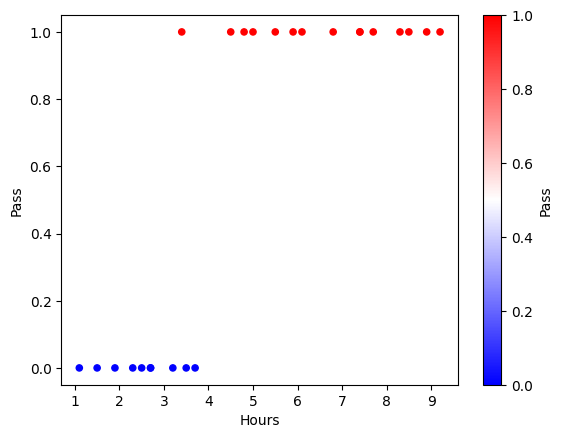

In [ ]:
x = df["Pregnancies"]

y = df["Outcome"]
df.plot.scatter(x="Hours",y="Pass",c="Pass",colormap='bwr')
plt.show()

In [ ]:
def sigmoid(z):

    return 1 / (1+ np.exp(-z))

In [ ]:
def logistic_regression(all_x,all_y,m,b):
    for x,y_actual in zip(all_x,all_y):
        y_pred = sigmoid(m*x+b)
        error = y_pred - y_actual

        delta_m = -1 * (error * x) * 0.05
        delta_b = -1 * (error) * 0.05

        m = m + delta_m
        b = b + delta_b

    return m,b

In [ ]:
m = 0
b = 0
for i in range(0,100):
    m,b = logistic_regression(x,y,m,b)
m,b

(1.5493633083078429, -5.8807083566516765)

In [ ]:
### Helper function use when needed
def get_sigmoid(X,m,b):
    sig = []
    for x in X.values:
        y = sigmoid(m*x + b)
        sig.append(y)

    return sig

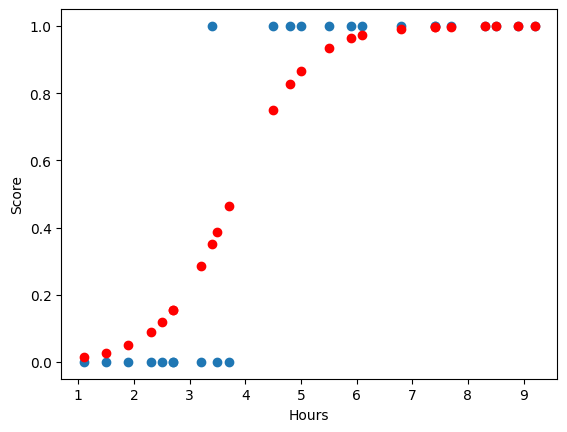

In [ ]:
plt.plot(x,y,'o')
plt.xlabel("Hours")
plt.ylabel("Score")

sig = get_sigmoid(x,m,b)
plt.plot(x,sig,'ro')
plt.show()

In [ ]:
def predict(x,m,b):
    y = sigmoid(m*x + b)

    if y > 0.5:
        return 1
    else:
        return 0

df["Predictions"] = df.apply(lambda row: predict(row["Hours"],m,b),axis=1)
df

,Hours,Scores,Pass,Predictions
0,2.3,18,0,0
1,5.0,45,1,1
2,3.2,25,0,0
3,8.5,72,1,1
4,3.5,30,0,0
5,1.5,20,0,0
6,9.2,88,1,1
7,5.5,60,1,1
8,8.3,81,1,1
9,2.7,25,0,0
